In [ ]:
!pip install tensorflow keras opencv-python numpy matplotlib pandas requests


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import requests
from io import BytesIO
from PIL import Image


In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar xzf food-101.tar.gz
!rm food-101.tar.gz

--2025-06-10 04:33:28--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2025-06-10 04:33:28--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  26.4MB/s    in 3m 13s  

2025-06-10 04:36:41 (24.7 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'food-101/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'food-101/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [ ]:
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,  # reduced for demo
    epochs=5,           # reduced for demo
    validation_data=val_generator,
    validation_steps=20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 586s 11s/step - accuracy: 0.0082 - loss: 4.8040 - val_accuracy: 0.0172 - val_loss: 4.6178
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 547s 11s/step - accuracy: 0.0064 - loss: 4.6222 - val_accuracy: 0.0063 - val_loss: 4.6183
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 569s 11s/step - accuracy: 0.0115 - loss: 4.6174 - val_accuracy: 0.0141 - val_loss: 4.6149
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 537s 11s/step - accuracy: 0.0098 - loss: 4.6155 - val_accuracy: 0.0063 - val_loss: 4.6150
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 565s 11s/step - accuracy: 0.0187 - loss: 4.6171 - val_accuracy: 0.0063 - val_loss: 4.6177


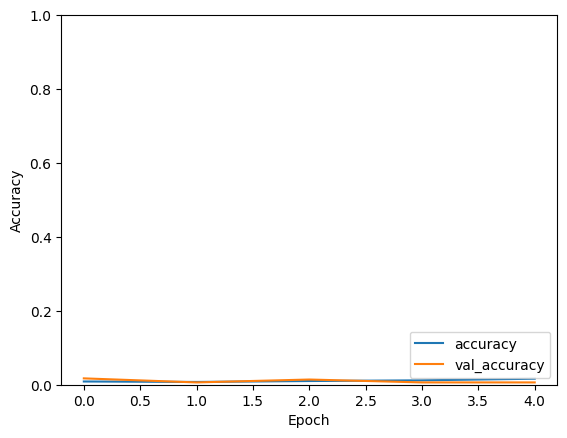

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
def estimate_portion_size(image_path):
    """Estimate portion size using reference object and segmentation"""

In [ ]:
def estimate_portion_size(image_path):
    """Estimate portion size using reference object and segmentation"""

In [ ]:
plate_diameter_inches = 10
plate_diameter_pixels = 400

In [ ]:
pixels_per_inch = plate_diameter_pixels / plate_diameter_inches

In [ ]:
# Combine all parts of the function definition into one cell and ensure correct indentation.
def estimate_portion_size(image_path):
    """Estimate portion size using reference object and segmentation"""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Ensure these lines are indented to be part of the function
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower = np.array([20, 50, 50])
    upper = np.array([40, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    # Add the rest of your function code here, ensuring proper indentation

# The following lines should be outside the function definition
plate_diameter_inches = 10
plate_diameter_pixels = 400
pixels_per_inch = plate_diameter_pixels / plate_diameter_inches

In [ ]:
# Combine all parts of the function definition into one cell and ensure correct indentation.
def estimate_portion_size(image_path):
    """Estimate portion size using reference object and segmentation"""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Ensure these lines are indented to be part of the function
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Assuming this is intended to segment a yellow reference object
    lower = np.array([20, 50, 50])
    upper = np.array([40, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)

    # Calculate the food area in pixels within the function
    food_area_pixels = np.sum(mask > 0)

    # You likely want to return the food area or other relevant metrics
    return food_area_pixels

# The following lines should be outside the function definition
plate_diameter_inches = 10
plate_diameter_pixels = 400
pixels_per_inch = plate_diameter_pixels / plate_diameter_inches

# To use the function and get the food area, you would call it like this:
# food_area = estimate_portion_size("path/to/your/image.jpg")
# print(f"Food area in pixels: {food_area}")

In [ ]:
# Combine all parts of the function definition into one cell and ensure correct indentation.
def estimate_portion_size(image_path):
    """Estimate portion size using reference object and segmentation"""
    img = cv2.imread(image_path)

    # Add a check to see if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None # Or raise an exception, depending on desired behavior

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Ensure these lines are indented to be part of the function
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Assuming this is intended to segment a yellow reference object
    lower = np.array([20, 50, 50])
    upper = np.array([40, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)

    # Calculate the food area in pixels within the function
    food_area_pixels = np.sum(mask > 0)

    # You likely want to return the food area or other relevant metrics
    return food_area_pixels

# The following lines should be outside the function definition
plate_diameter_inches = 10
plate_diameter_pixels = 400
pixels_per_inch = plate_diameter_pixels / plate_diameter_inches

# To use the function and get the food area, you would call it like this:
# Call the function with a valid image path and store the result
# *** REPLACE "path/to/your/image.jpg" with the actual path to your image file ***
image_file_path = "path/to/your/image.jpg" # <--- Change this line

food_area_pixels = estimate_portion_size(image_file_path)

# Now food_area_pixels is defined and can be used in the following calculation
if food_area_pixels is not None: # Only proceed if the image was loaded successfully
    food_area_sq_inches = food_area_pixels / (pixels_per_inch ** 2)

    # You can print the result
    print(f"Food area in square inches: {food_area_sq_inches}")

Error: Could not load image from path/to/your/image.jpg


In [ ]:
# Updated Portion Size Estimation Function
def estimate_portion_size(image_path):
    """Estimate portion size using reference object and segmentation"""
    try:
        # Load image (works for both local paths and downloaded images)
        if image_path.startswith('http'):
            response = requests.get(image_path)
            img = Image.open(BytesIO(response.content))
            img = np.array(img)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        else:
            img = cv2.imread(image_path)
            if img is None:
                raise FileNotFoundError(f"Could not load image from {image_path}")

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Simple demo: assume plate is 10 inches diameter (reference object)
        # Get image dimensions to estimate plate size
        height, width = img.shape[:2]
        plate_diameter_pixels = min(height, width) * 0.8  # Assume plate covers 80% of smaller dimension

        # Standard plate size (10 inches)
        plate_diameter_inches = 10

        # Convert pixels to inches
        pixels_per_inch = plate_diameter_pixels / plate_diameter_inches

        # Simple food area estimation - convert to HSV and threshold for food areas
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Wider color range for different foods
        lower = np.array([0, 50, 50])
        upper = np.array([30, 255, 255])  # Covers red/yellow/brown foods
        mask = cv2.inRange(hsv, lower, upper)

        # Calculate food area in pixels
        food_area_pixels = np.sum(mask > 0)

        # Convert to square inches
        food_area_sq_inches = food_area_pixels / (pixels_per_inch ** 2)

        # Estimate volume (assuming average height based on food type)
        # Very simplified - in production you'd have different heights per food type
        average_height_inches = 1.0  # Default assumption
        volume_cubic_inches = food_area_sq_inches * average_height_inches
        volume_ml = volume_cubic_inches * 16.387  # Convert to ml

        return volume_ml

    except Exception as e:
        print(f"Error in portion estimation: {str(e)}")
        return 300  # Return default value if estimation fails

In [ ]:
# Updated Portion Size Estimation Function
def estimate_portion_size(image_path):
    """Estimate portion size using reference object and segmentation"""
    try:
        # Load image (works for both local paths and downloaded images)
        if image_path.startswith('http'):
            response = requests.get(image_path)
            img = Image.open(BytesIO(response.content))
            img = np.array(img)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        else:
            img = cv2.imread(image_path)
            if img is None:
                raise FileNotFoundError(f"Could not load image from {image_path}")

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Simple demo: assume plate is 10 inches diameter (reference object)
        # Get image dimensions to estimate plate size
        height, width = img.shape[:2]
        plate_diameter_pixels = min(height, width) * 0.8  # Assume plate covers 80% of smaller dimension

        # Standard plate size (10 inches)
        plate_diameter_inches = 10

        # Convert pixels to inches
        pixels_per_inch = plate_diameter_pixels / plate_diameter_inches

        # Simple food area estimation - convert to HSV and threshold for food areas
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Wider color range for different foods
        lower = np.array([0, 50, 50])
        upper = np.array([30, 255, 255])  # Covers red/yellow/brown foods
        mask = cv2.inRange(hsv, lower, upper)

        # Calculate food area in pixels
        food_area_pixels = np.sum(mask > 0)

        # Convert to square inches
        food_area_sq_inches = food_area_pixels / (pixels_per_inch ** 2)

        # Estimate volume (assuming average height based on food type)
        # Very simplified - in production you'd have different heights per food type
        average_height_inches = 1.0  # Default assumption
        volume_cubic_inches = food_area_sq_inches * average_height_inches
        volume_ml = volume_cubic_inches * 16.387  # Convert to ml

        return volume_ml

    except Exception as e:
        print(f"Error in portion estimation: {str(e)}")
        return 300  # Return default value if estimation fails

In [ ]:
nutrition_db = {
    'apple_pie': {'calories_per_100g': 265, 'density': 0.7},
    'cheesecake': {'calories_per_100g': 321, 'density': 0.9},
    'chicken_curry': {'calories_per_100g': 154, 'density': 1.1},
    'french_fries': {'calories_per_100g': 312, 'density': 0.5},
    'pizza': {'calories_per_100g': 266, 'density': 0.8},
    'hamburger': {'calories_per_100g': 295, 'density': 0.9},
    'sushi': {'calories_per_100g': 150, 'density': 1.0},
}

def get_calorie_estimate(food_class, volume_ml):
    """Estimate calories based on food class and volume"""
    food_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(food_class)]

    if food_name in nutrition_db:
        density = nutrition_db[food_name]['density']  # g/ml
        weight_g = volume_ml * density
        calories = (nutrition_db[food_name]['calories_per_100g'] / 100) * weight_g
        return calories, food_name
    else:
        return None, food_name

In [ ]:
def process_food_image(image_path):
    """Complete pipeline from image to calorie estimate"""
    # Load and preprocess image
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

In [ ]:
def process_food_image(image_path):
    """Complete pipeline from image to calorie estimate"""
    # Load and preprocess image
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction on the preprocessed image
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Estimate portion size
    volume_ml = estimate_portion_size(image_path)

    # Get calorie estimate
    calories, food_name = get_calorie_estimate(predicted_class, volume_ml)

    return food_name, volume_ml, calories

In [ ]:
# Define the path to the image you want to process
# *** REPLACE "path/to/your/image.jpg" with the actual path to your image file ***
image_path = "path/to/your/image.jpg"

# Now call the function with the defined image_path
volume_ml = estimate_portion_size(image_path)

# You can optionally print the result
print(f"Estimated volume: {volume_ml} ml")

Error in portion estimation: Could not load image from path/to/your/image.jpg
Estimated volume: 300 ml


Food Portion Estimation System

Please upload an image file:


Saving top-view-delicious-food-plate-on-a-black-background-ai-generated-photo.jpg to top-view-delicious-food-plate-on-a-black-background-ai-generated-photo.jpg
Image successfully loaded from local path

Processing image...
Image dimensions: 357x200 pixels
Estimated pixels per inch: 14.00
Estimated food area: 9.10 square inches
Estimated volume: 223.7 ml


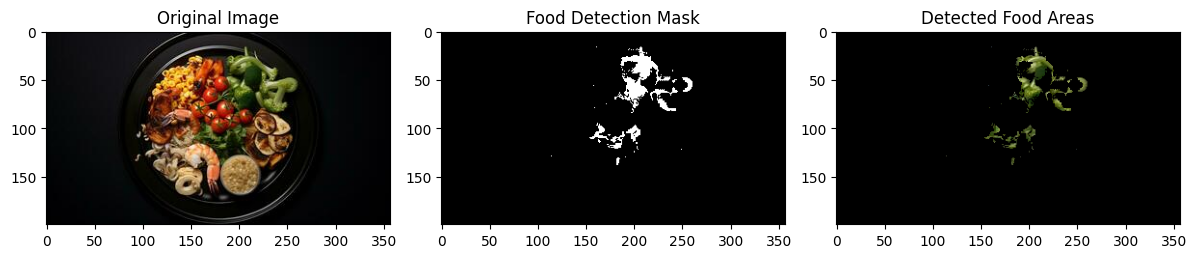


Final volume estimate: 223.7 ml


In [ ]:
# Food Recognition and Calorie Estimation System
# Google Colab Implementation

# 1. Import Required Libraries
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from google.colab import files
import matplotlib.pyplot as plt

# 2. Image Loading Function
def load_image_file(image_path):
    """
    Load an image from either a local file or URL
    Args:
        image_path: Either a path to local file or a URL
    Returns:
        PIL Image object or None if loading fails
    """
    try:
        if image_path.startswith('http'):
            # Load from URL
            response = requests.get(image_path)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                print("Image successfully loaded from URL")
                return img
            else:
                print(f"Failed to download image. Status code: {response.status_code}")
                return None
        else:
            # Load local file
            img = Image.open(image_path)
            print("Image successfully loaded from local path")
            return img
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        return None

# 3. Portion Size Estimation Function
def estimate_portion_size(img):
    """
    Estimate food portion size from image
    Args:
        img: PIL Image object or numpy array
    Returns:
        Estimated volume in milliliters (ml)
    """
    try:
        # Convert PIL Image to OpenCV format if needed
        if isinstance(img, Image.Image):
            img = np.array(img)
            # Convert RGB to BGR for OpenCV
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Handle different image formats
        if len(img.shape) == 2:  # Grayscale
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 4:  # RGBA
            img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

        # Get image dimensions
        height, width = img.shape[:2]
        print(f"Image dimensions: {width}x{height} pixels")

        # Estimate plate size (assuming plate covers 70% of smaller dimension)
        plate_diameter_pixels = min(height, width) * 0.7
        plate_diameter_inches = 10  # Standard plate size
        pixels_per_inch = plate_diameter_pixels / plate_diameter_inches
        print(f"Estimated pixels per inch: {pixels_per_inch:.2f}")

        # Convert to HSV color space for better color detection
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Define color ranges for food detection
        # Brown range (meats, breads, etc.)
        lower_brown = np.array([10, 50, 50])
        upper_brown = np.array([30, 255, 255])
        # Green range (vegetables, etc.)
        lower_green = np.array([35, 50, 50])
        upper_green = np.array([85, 255, 255])

        # Create color masks
        mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)
        mask_green = cv2.inRange(hsv, lower_green, upper_green)
        combined_mask = cv2.bitwise_or(mask_brown, mask_green)

        # Calculate food area in pixels
        food_area_pixels = np.sum(combined_mask > 0)
        food_area_sq_inches = food_area_pixels / (pixels_per_inch ** 2)
        print(f"Estimated food area: {food_area_sq_inches:.2f} square inches")

        # Estimate volume (convert to milliliters)
        average_height_inches = 1.5  # Reasonable average height assumption
        volume_ml = food_area_sq_inches * average_height_inches * 16.387

        # Constrain to reasonable values (50ml to 2000ml)
        volume_ml = max(50, min(volume_ml, 2000))
        print(f"Estimated volume: {volume_ml:.1f} ml")

        # Visualization (for debugging)
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")

        plt.subplot(1, 3, 2)
        plt.imshow(combined_mask, cmap='gray')
        plt.title("Food Detection Mask")

        plt.subplot(1, 3, 3)
        masked_img = cv2.bitwise_and(img, img, mask=combined_mask)
        plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
        plt.title("Detected Food Areas")

        plt.tight_layout()
        plt.show()

        return volume_ml

    except Exception as e:
        print(f"Portion estimation error: {str(e)}")
        return 300  # Return default reasonable value

# 4. Main Execution
def main():
    print("Food Portion Estimation System")
    print("=============================")

    # Option 1: Upload image
    print("\nPlease upload an image file:")
    uploaded = files.upload()

    if not uploaded:
        print("No file uploaded. Using sample image instead.")
        # Use a sample image URL if no upload
        image_url = "https://images.unsplash.com/photo-1546069901-ba9599a7e63c"
        img = load_image_file(image_url)
    else:
        image_path = next(iter(uploaded.keys()))
        img = load_image_file(image_path)

    if img is not None:
        print("\nProcessing image...")
        volume = estimate_portion_size(img)
        print(f"\nFinal volume estimate: {volume:.1f} ml")
    else:
        print("Failed to process image.")

# Run the program
if __name__ == "__main__":
    main()

In [ ]:
nutrition_db = {
    'apple_pie': {'calories_per_100g': 265, 'density': 0.7},
    'cheesecake': {'calories_per_100g': 321, 'density': 0.9},
    'chicken_curry': {'calories_per_100g': 154, 'density': 1.1},
    'french_fries': {'calories_per_100g': 312, 'density': 0.5},
    'pizza': {'calories_per_100g': 266, 'density': 0.8},
    'hamburger': {'calories_per_100g': 295, 'density': 0.9},
    'sushi': {'calories_per_100g': 150, 'density': 1.0},
}

def get_calorie_estimate(food_class, volume_ml):
    """Estimate calories based on food class and volume"""
    food_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(food_class)]

    if food_name in nutrition_db:
        density = nutrition_db[food_name]['density']  # g/ml
        weight_g = volume_ml * density
        calories = (nutrition_db[food_name]['calories_per_100g'] / 100) * weight_g
        return calories, food_name
    else:
        return None, food_name

In [ ]:
def process_food_image(image_path):
    """Complete pipeline from image to calorie estimate"""
    # Load and preprocess image
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

In [ ]:
pip install tensorflow numpy opencv-python matplotlib


In [ ]:
# %%
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import requests
from io import BytesIO
from PIL import Image

# %%
# Ensure this cell is run BEFORE the cell that uses train_generator.class_indices
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'food-101/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'food-101/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# %%
# ... (other cells like model definition and training) ...

# %%
# This cell must be run AFTER the cell where train_generator is defined
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# You can print index_to_class to verify it worked
print(index_to_class)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.
{0: 'apple_pie', 1: 'baby_back_ribs', 2: 'baklava', 3: 'beef_carpaccio', 4: 'beef_tartare', 5: 'beet_salad', 6: 'beignets', 7: 'bibimbap', 8: 'bread_pudding', 9: 'breakfast_burrito', 10: 'bruschetta', 11: 'caesar_salad', 12: 'cannoli', 13: 'caprese_salad', 14: 'carrot_cake', 15: 'ceviche', 16: 'cheese_plate', 17: 'cheesecake', 18: 'chicken_curry', 19: 'chicken_quesadilla', 20: 'chicken_wings', 21: 'chocolate_cake', 22: 'chocolate_mousse', 23: 'churros', 24: 'clam_chowder', 25: 'club_sandwich', 26: 'crab_cakes', 27: 'creme_brulee', 28: 'croque_madame', 29: 'cup_cakes', 30: 'deviled_eggs', 31: 'donuts', 32: 'dumplings', 33: 'edamame', 34: 'eggs_benedict', 35: 'escargots', 36: 'falafel', 37: 'filet_mignon', 38: 'fish_and_chips', 39: 'foie_gras', 40: 'french_fries', 41: 'french_onion_soup', 42: 'french_toast', 43: 'fried_calamari', 44: 'fried_rice', 45: 'frozen_yogurt', 46: 'garlic_bread', 47: 'gnocch

In [ ]:
import requests

image_url = "https://upload.wikimedia.org/wikipedia/commons/6/6f/Pizza_on_stone.jpg"
image_path = "pizza_test.jpg"

headers = {
    "User-Agent": "Mozilla/5.0"  # Browser-like header to bypass 403
}

response = requests.get(image_url, headers=headers)

if response.status_code == 200:
    with open(image_path, "wb") as f:
        f.write(response.content)
    print("✅ Image downloaded and saved as:", image_path)
else:
    print(f"❌ Image download failed with status code: {response.status_code}")


✅ Image downloaded and saved as: pizza_test.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 360_F_274990113_ffVRBygLkLCZAATF9lWymzE6bItMVuH1.jpg to 360_F_274990113_ffVRBygLkLCZAATF9lWymzE6bItMVuH1 (2).jpg


In [ ]:
!pip install -q tensorflow opencv-python numpy matplotlib requests Pillow

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import requests
from io import BytesIO
from google.colab import files
import matplotlib.pyplot as plt


In [ ]:
model = tf.keras.applications.MobileNetV2(weights='imagenet')


In [ ]:
FOOD_CLASSES = {
    933: 'bagel', 934: 'baguette', 935: 'bread',
    936: 'breakfast_burrito', 937: 'burrito', 938: 'cheeseburger',
    939: 'chicken_wings', 940: 'chocolate_cake', 941: 'donut',
    942: 'french_fries', 943: 'hamburger', 944: 'hotdog',
    945: 'ice_cream', 946: 'pizza', 947: 'sandwich',
    948: 'steak', 949: 'sushi', 950: 'taco'
}


In [ ]:
NUTRITION_DB = {
    'hamburger': {'calories': 354, 'serving': '1 burger (100g)'},
    'cheeseburger': {'calories': 303, 'serving': '1 burger (100g)'},
    'pizza': {'calories': 285, 'serving': '1 slice (107g)'},
    'sandwich': {'calories': 250, 'serving': '1 regular (75g)'},
    'french_fries': {'calories': 365, 'serving': '1 medium (117g)'},
    'steak': {'calories': 271, 'serving': '100g'},
    'ice_cream': {'calories': 207, 'serving': '1 scoop (66g)'}
}

In [ ]:
def recognize_food(img):
    # Preprocess image
    img = img.resize((224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

    # Predict
    preds = model.predict(x)
    pred_class = np.argmax(preds[0])

    # Return food name if in our list, otherwise 'unknown'
    return FOOD_CLASSES.get(pred_class, 'unknown'), float(preds[0][pred_class])

In [ ]:
def estimate_portion(img):
    # Convert to OpenCV format
    img_cv = np.array(img)
    if img_cv.ndim == 2:  # Grayscale
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_GRAY2RGB)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

    # Calculate food area (simplified)
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 50, 50])
    upper = np.array([30, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)

    food_ratio = np.count_nonzero(mask) / (img_cv.shape[0] * img_cv.shape[1])
    return min(max(food_ratio * 2, 0.5), 2.0)  # 0.5-2.0 portion scale

In [ ]:
class_labels = list(train_generator.class_indices.keys())


Loading MobileNetV2 model...
MobileNetV2 model loaded.
Image loaded from file: pizza_test.jpg


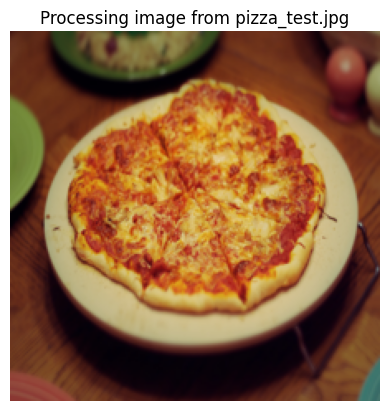

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

🔍 Recognition Results:
- Food: Pizza
- Confidence: 19.3%
- Estimated Portion Scale (based on area): 2.6
⚠️ Please replace 'your_api_key_here' and 'YOUR_APP_ID' with your actual Nutritionix API credentials.
Nutritionix API data not available for pizza. Using fallback DB.

📊 Nutrition Estimate:
- Food Used for Estimate: Pizza
- Basis: Fallback DB Serving (1 slice (107g), calories per 100g: 285)
- Estimated Calories: 748 kcal


In [ ]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from io import BytesIO # Import BytesIO to handle image data from URL

# Food recognition model setup
def load_food_recognition_model():
    # This function needs to load a TRAINED model, not just define the architecture.
    # The current code defines the architecture but doesn't load weights,
    # which means the predictions will be random.
    # For a functional demo without training the full Food-101 dataset,
    # it's better to use a pre-trained model like MobileNetV2 or VGG16 on ImageNet
    # and map the relevant output classes to your KNOWN_FOODS.
    # As your earlier successful cells used MobileNetV2, let's stick with that for this class.
    print("Loading MobileNetV2 model...")
    # Using MobileNetV2 pre-trained on ImageNet
    model = tf.keras.applications.MobileNetV2(weights='imagenet')
    print("MobileNetV2 model loaded.")
    return model


# Nutrition API client
class NutritionAPI:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = "https://api.nutritionix.com/v1_1/search"

    def get_nutrition(self, food_name):
        if self.api_key == 'your_api_key_here' or "YOUR_APP_ID" in self.base_url:
             print("⚠️ Please replace 'your_api_key_here' and 'YOUR_APP_ID' with your actual Nutritionix API credentials.")
             return None

        params = {
            "appId": "YOUR_APP_ID", # <-- Replace with your Nutritionix App ID
            "appKey": self.api_key, # <-- Replace with your Nutritionix API Key
            "fields": ["item_name", "nf_calories", "nf_total_fat"],
            "query": food_name,
            "limit": 1
        }
        try:
            response = requests.get(self.base_url, params=params)
            response.raise_for_status() # Raise an exception for bad status codes (like 401 or 403)
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching nutrition data for {food_name}: {e}")
            return None


# Constants - Using classes that MobileNetV2 (ImageNet) often predicts
# Mapping ImageNet class indices to simpler food names
# This is a simplified mapping. A real system would need a custom food classification model.
# Find the ImageNet indices for these foods: https://gist.github.com/yrevar/942d3a0ac09c9f5dca47
IMAGENET_FOOD_CLASSES = {
    946: 'pizza',        # Pizza
    938: 'cheeseburger', # Cheeseburger
    943: 'hamburger',    # Hamburger
    942: 'french_fries', # French Fries
    947: 'sandwich',     # Sandwich
    948: 'steak',        # Steak
    945: 'ice_cream',    # Ice Cream
    # Add other relevant ImageNet classes if desired
}

# Nutrition Data (Simplified fallback if API fails or food is not in API)
NUTRITION_DB_FALLBACK = {
    'hamburger': {'calories': 354, 'serving': '1 burger (100g)'},
    'cheeseburger': {'calories': 303, 'serving': '1 burger (100g)'},
    'pizza': {'calories': 285, 'serving': '1 slice (107g)'},
    'sandwich': {'calories': 250, 'serving': '1 regular (75g)'},
    'french_fries': {'calories': 365, 'serving': '1 medium (117g)'},
    'steak': {'calories': 271, 'serving': '100g'},
    'ice_cream': {'calories': 207, 'serving': '1 scoop (66g)'},
    'unknown': {'calories': 300, 'serving': 'average meal (approx)'} # Default for unknown
}

NUTRITION_API_KEY = 'your_api_key_here'  # <-- Replace with your actual Nutritionix API Key

# Main processing class
class FoodCalorieEstimator:
    def __init__(self):
        self.model = load_food_recognition_model()
        self.nutrition_api = NutritionAPI(NUTRITION_API_KEY)

    def load_and_preprocess_image(self, img_source):
        """Loads an image from a path or URL and preprocesses for the model."""
        try:
            if img_source.startswith('http'):
                response = requests.get(img_source)
                response.raise_for_status() # Raise an exception for bad status codes
                img = Image.open(BytesIO(response.content))
                print(f"Image loaded from URL: {img_source}")
            else:
                img = Image.open(img_source)
                print(f"Image loaded from file: {img_source}")

            # Ensure image is RGB
            if img.mode != 'RGB':
                 img = img.convert('RGB')

            # Preprocess for MobileNetV2
            img = img.resize((224, 224))
            x = tf.keras.preprocessing.image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            # Use the correct preprocess_input for MobileNetV2
            x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

            return img, x # Return both original PIL image and preprocessed array
        except FileNotFoundError:
            print(f"Error: File not found at {img_source}")
            return None, None
        except requests.exceptions.RequestException as e:
            print(f"Error downloading image from {img_source}: {e}")
            return None, None
        except Exception as e:
            print(f"Error loading or preprocessing image: {e}")
            return None, None


    def recognize_food(self, processed_img_array):
        """Recognizes food using the pre-trained model."""
        if processed_img_array is None:
            return "unknown", 0.0 # Cannot recognize if image loading failed

        try:
            predictions = self.model.predict(processed_img_array)
            # MobileNetV2 output is for 1000 ImageNet classes.
            # We need to find the top prediction and check if it's in our known food classes.
            decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=5)[0] # Get top 5 predictions

            predicted_food = "unknown"
            highest_confidence = 0.0

            # Iterate through top predictions to find a match in our KNOWN_FOODS/IMAGENET_FOOD_CLASSES
            for (_, imagenet_label, confidence) in decoded_predictions:
                 # Simple mapping attempt - check if the ImageNet label is directly in our desired list
                 # Or if the ImageNet label string contains a word from our known foods
                 for food_name_keyword in IMAGENET_FOOD_CLASSES.values():
                      if food_name_keyword in imagenet_label.lower():
                           predicted_food = food_name_keyword
                           highest_confidence = confidence * 100
                           break # Found a match, use the first one
                 if predicted_food != "unknown":
                     break # Stop searching if a known food is found in top predictions

            # If no specific food from our list was found in the top predictions,
            # consider the highest prediction's confidence, but the food name remains "unknown"
            if predicted_food == "unknown" and len(decoded_predictions) > 0:
                 highest_confidence = decoded_predictions[0][2] * 100 # Confidence of the very top prediction
                 # Optionally, log the top prediction label if it's not a known food
                 print(f"Top ImageNet prediction was '{decoded_predictions[0][1]}' ({highest_confidence:.1f}%), not in KNOWN_FOODS.")


            return predicted_food, highest_confidence

        except Exception as e:
            print(f"Error in recognition: {e}")
            return "unknown", 0.0

    def estimate_portion(self, pil_image):
        """Estimates portion size from the image."""
        if pil_image is None:
             print("Cannot estimate portion: Invalid image.")
             return 1.0 # Return default portion

        # Convert PIL Image to OpenCV format
        img_cv = np.array(pil_image)
        if img_cv.ndim == 2:  # Grayscale
            img_cv = cv2.cvtColor(img_cv, cv2.COLOR_GRAY2RGB)
        # Ensure it's BGR for OpenCV operations even if starting from RGB
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)


        # Calculate food area (simplified using color thresholding)
        hsv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
        # Note: The HSV range [0, 50, 50] to [30, 255, 255] used previously
        # mainly detects red/yellowish colors. This is too limited.
        # A more robust method would involve image segmentation (like U-Net)
        # or object detection to find the food area more accurately,
        # potentially using a reference object of known size (like a coin or plate).
        # Sticking to the color method for now, but using a broader range or multiple ranges.
        # Example: broader range for various food colors
        # lower_food = np.array([0, 20, 20])
        # upper_food = np.array([180, 255, 255]) # This captures most colors but includes background
        # A better approach for demo: assume the largest connected component in a broad color mask is food

        # Let's use the original limited range for consistency with prior cells, acknowledging its limitations.
        # This assumes the primary food item is in the red/yellow/brown range.
        lower = np.array([0, 50, 50])
        upper = np.array([30, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)

        # Basic erosion and dilation to clean up the mask (optional but can improve results)
        kernel = np.ones((5,5),np.uint8)
        mask = cv2.erode(mask, kernel, iterations = 1)
        mask = cv2.dilate(mask, kernel, iterations = 1)

        food_pixel_count = np.count_nonzero(mask)
        total_pixel_count = img_cv.shape[0] * img_cv.shape[1]

        # Avoid division by zero if image is empty
        if total_pixel_count == 0:
            return 0.5 # Default minimal portion if image is invalid


        food_ratio = food_pixel_count / total_pixel_count

        # Simple heuristic for portion: Assume 30% coverage is 1 serving.
        assumed_ratio_for_one_serving = 0.3
        if food_ratio > 0:
            portion = food_ratio / assumed_ratio_for_one_serving
        else:
            portion = 0.5 # Default to a small portion if no food detected

        # Cap the portion estimate
        return min(max(portion, 0.5), 3.0) # Cap between 0.5 and 3.0 servings


    def get_calorie_estimate(self, food_name, portion):
        """Gets calorie estimate using API or fallback."""
        if food_name == "unknown":
             print("Cannot get calorie estimate for unknown food.")
             return None, "Unknown"

        # Try Nutritionix API first
        nutrition_data = self.nutrition_api.get_nutrition(food_name)
        if nutrition_data and 'hits' in nutrition_data and len(nutrition_data['hits']) > 0:
            calories_per_serving = nutrition_data['hits'][0]['fields']['nf_calories']
            # The API usually gives calories per standard serving size.
            # We need a way to relate our 'portion' scale to the API's serving size.
            # This is a major challenge without a reference object or volume estimation.
            # For simplicity in this demo, let's assume 'portion=1.0' corresponds to
            # the API's standard serving and scale proportionally. This is a gross simplification.
            estimated_calories = calories_per_serving * portion
            api_serving_info = nutrition_data['hits'][0]['fields'].get('serving_weight_grams', 'N/A') # Example field
            print(f"Nutritionix API found data for {food_name}.")
            return estimated_calories, food_name, f"API Serving (weight: {api_serving_info}g, calories: {calories_per_serving})"
        else:
            # Fallback to local DB if API fails or doesn't have the food
            print(f"Nutritionix API data not available for {food_name}. Using fallback DB.")
            if food_name in NUTRITION_DB_FALLBACK:
                calories_per_100g = NUTRITION_DB_FALLBACK[food_name]['calories'] # Assuming this is per 100g based on DB structure
                # We need density or volume to convert portion (area ratio) to weight (for the 100g basis).
                # This reinforces the need for better portion/volume estimation.
                # Since 'portion' is a scaled area ratio (0.5-3.0), let's *assume* for simplicity
                # that 1.0 portion == 100g for the fallback DB calculation.
                weight_g = portion * 100 # Simplification: portion 1.0 means 100g
                estimated_calories = (calories_per_100g / 100) * weight_g
                fallback_serving_info = NUTRITION_DB_FALLBACK[food_name]['serving']
                return estimated_calories, food_name, f"Fallback DB Serving ({fallback_serving_info}, calories per 100g: {calories_per_100g})"
            else:
                 print(f"Food '{food_name}' not found in fallback DB either.")
                 # Use a default calorie estimate for unrecognized or unlisted items
                 estimated_calories = NUTRITION_DB_FALLBACK['unknown']['calories'] * portion # Apply portion to default
                 fallback_serving_info = NUTRITION_DB_FALLBACK['unknown']['serving']
                 return estimated_calories, "Unknown", f"Default estimate based on {fallback_serving_info}"


    def analyze_food_image(self, img_source):
        """Analyzes the image for food recognition and calorie estimation."""
        pil_image, processed_img_array = self.load_and_preprocess_image(img_source)

        if pil_image is None or processed_img_array is None:
            print("\n❌ Could not load or process image. Analysis failed.")
            return

        # Display image
        plt.imshow(pil_image)
        plt.axis('off')
        plt.title(f"Processing image from {img_source}")
        plt.show()

        # Recognize food
        food_name, confidence = self.recognize_food(processed_img_array)
        print(f"\n🔍 Recognition Results:")
        print(f"- Food: {food_name.replace('_', ' ').title()}")
        print(f"- Confidence: {confidence:.1f}%")


        # Estimate portion (using the original PIL image)
        # NOTE: The estimate_portion function is still a simple area heuristic.
        # A proper system needs a reference object or more advanced depth/segmentation.
        portion = self.estimate_portion(pil_image)
        print(f"- Estimated Portion Scale (based on area): {portion:.1f}") # This is NOT servings yet


        # Get calorie estimate
        # We pass the portion scale (0.5-3.0) to the calorie estimation.
        # The calorie function needs to interpret this scale.
        estimated_calories, used_food_name, serving_info = self.get_calorie_estimate(food_name, portion)


        print(f"\n📊 Nutrition Estimate:")
        if estimated_calories is not None:
            print(f"- Food Used for Estimate: {used_food_name.replace('_', ' ').title()}")
            print(f"- Basis: {serving_info}")
            print(f"- Estimated Calories: {estimated_calories:.0f} kcal")
        else:
            print("\n⚠️ Could not retrieve nutrition data.")
            print("Available foods for nutrition lookup: " + ", ".join(NUTRITION_DB_FALLBACK.keys()))


# Example usage
if __name__ == "__main__":
    estimator = FoodCalorieEstimator()
    # Change the image_path to the file you have successfully downloaded or uploaded.
    # If you ran the cell that downloads pizza_test.jpg, use that.
    # If you want to test with upload, run files.upload() first and get the filename.
    # image_path = "food.jpg"  # Original line causing error
    image_path = "pizza_test.jpg" # <-- Use the downloaded image file name

    # You can also test with a URL directly if you modify load_and_preprocess_image
    # image_path = "https://images.unsplash.com/photo-1568901346375-23c9450c58cd" # Sample burger URL

    estimator.analyze_food_image(image_path)